# Decision Tree

CART (Classification and Regression Tree)

## What is Decision Tree?

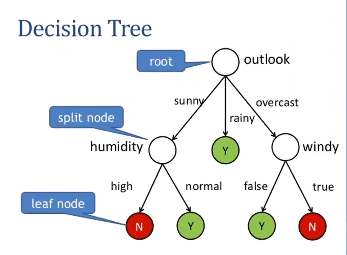

***


* Supervised Learning

* Works for both classification and regression

* Foundation of Random Forests

* Attractive because of interpretability



***




Decision Tree works by:

* Split based on set impurity criteria
* Stopping criteria


***



Source: [Scikit-Learn](http://scikit-learn.org/stable/modules/tree.html#tree)

Some **advantages** of decision trees are:
* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. 
* Able to handle both numerical and categorical data.
* Possible to validate a model using statistical tests. 
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The **disadvantages** of decision trees include:
* Overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable. Mitigant: Use decision trees within an ensemble.
* Cannot guarantee to return the globally optimal decision tree. Mitigant: Training multiple trees in an ensemble learner
* Decision tree learners create biased trees if some classes dominate. Recommendation: Balance the dataset prior to fitting


***

Iris dataset Decision Tree

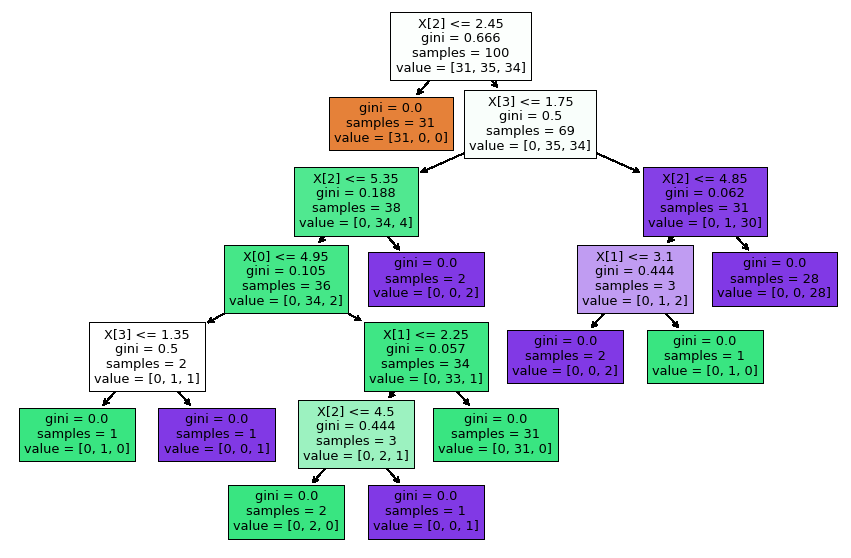

***

## Questions:

1. What is a decision tree?

2. Where can you apply decision tree to? numerical problems or categorical problems?

3. Decision tree is also know by what other name?

4. How does a decision tree work?

5. Decision Tree is a foundation of what machine learning algorithm

6. List and explain 3 advantages of decision tree

7. List and explain 3 disadvantages 


## Answers 

1. A tree-like model used for classification and regression tasks in machine learning.
   
2. Both numerical and categorical problems.

3. Classification and Regression Tree (CART).

4. It recursively splits data based on features to maximize information gain or minimize impurity.

5. Ensemble learning algorithms like Random Forests and Gradient Boosting Machines (GBMs).

6. 
   - Interpretability: Easy to understand and explain.
   - Handles both numerical and categorical data.
   - No assumptions about data distribution.

7. 
   - Prone to overfitting.
   - Can be sensitive to small variations in data.
   - Biased towards attributes with more levels.

***

# Classification

## Training a Decision Tree 

In [4]:
from sklearn import tree

In [5]:
X = [[0, 0], [1, 2]]
y = [0, 1]

In [6]:
clf = tree.DecisionTreeClassifier()

In [7]:
clf.fit(X, y)

DecisionTreeClassifier()

In [8]:
clf.predict([[2., 2.]])

array([1])

In [9]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [11]:
clf.predict([[0.4, 1.2]])

array([1])

In [12]:
clf.predict_proba([[0.4, 1.2]])

array([[0., 1.]])

`DecisionTreeClassifier` is capable of both binary (where the labels are [-1, 1] ) classification and multiclass (where the labels are [0, …, K-1]) classification.

## Applying to IRIS Dataset

In [13]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [16]:
iris.data[0:5]       # first 5 samples

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
X = iris.data[:, 2:]
y = iris.target

In [20]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [21]:
clf = clf.fit(X, y)

In [32]:
from sklearn.tree import export_graphviz

<h2> Export Graphviz

In [47]:
export_graphviz(
    clf,
    out_file = "tree.dot",
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled=True)

Run the following command to convert the image to a .png file


In [53]:
import os

dot_file = "tree.dot"
png_file = "tree.png"

os.system(f"dot -Tpng {dot_file} -o {png_file}")
print(f"Conversion successful. PNG file saved as '{png_file}'")

Conversion successful. PNG file saved as 'tree.png'


<img src="tree.png">

<h2> graphviz

In [61]:
import graphviz


In [62]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

In [63]:
graph = graphviz.Source(dot_data)

In [ ]:
graph

Ouput of above cell:
<img src="tree.png">


## Visualize the Decision Boundary

In [72]:
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
col = ["petal_length", "petal_width"]
X = df.loc[:, col]

In [77]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [78]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [79]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


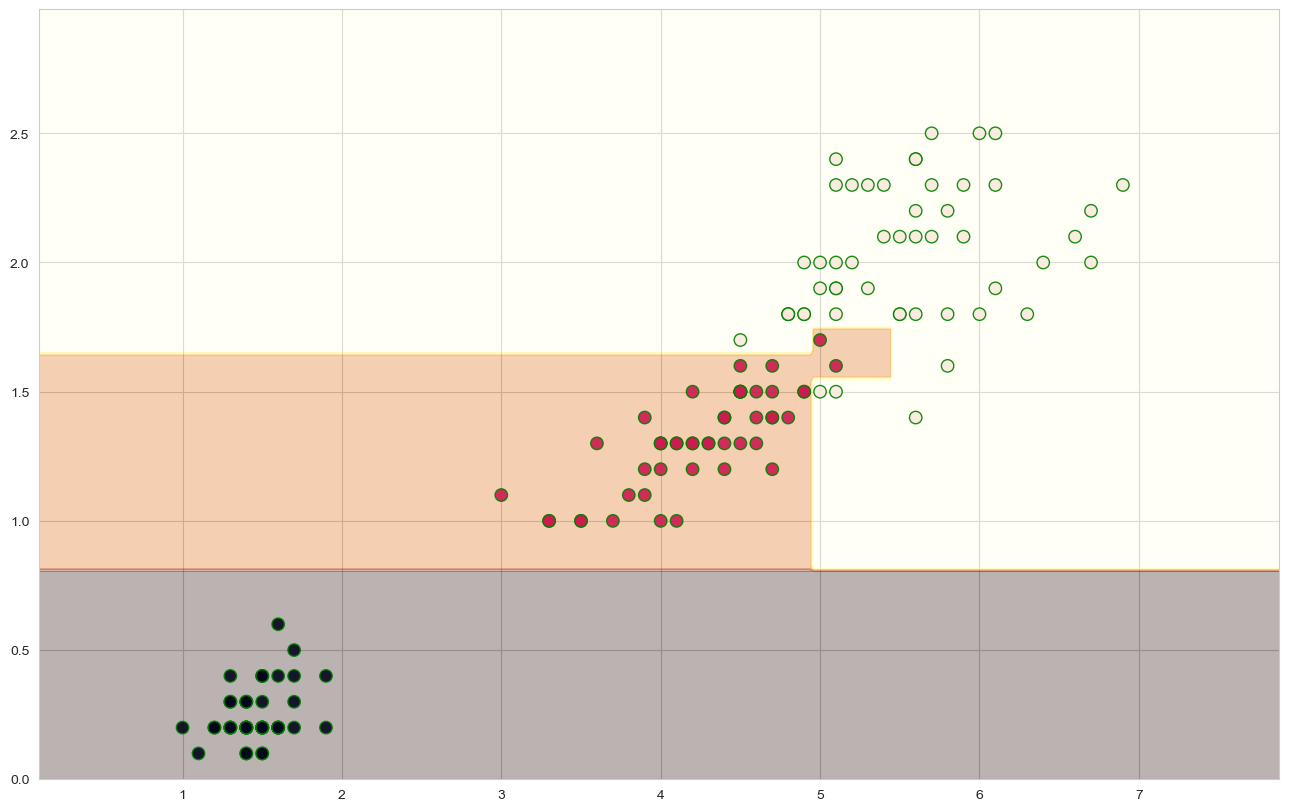

In [80]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

***

# Decision Tree Learning

### Algorthims



* [ID3](https://en.wikipedia.org/wiki/ID3_algorithm) (Iterative Dichotomiser 3)
* [C4.5](https://en.wikipedia.org/wiki/C4.5_algorithm) (successor of ID3)
* CART (Classification And Regression Tree)
* [CHAID](http://www.statisticssolutions.com/non-parametric-analysis-chaid/) (Chi-squared Automatic Interaction Detector). by [Gordon Kass](https://en.wikipedia.org/wiki/Chi-square_automatic_interaction_detection).

Scikit-learn uses an optimised version of CART algorithm


### Gini Impurity


scikit-learn default

[Gini Impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

A measure of purity / variability of categorical data

As a side note on the difference between [Gini Impurity and Gini Coefficient](https://datascience.stackexchange.com/questions/1095/gini-coefficient-vs-gini-impurity-decision-trees)

* No, despite their names they are not equivalent or even that similar.
* **Gini impurity** is a measure of misclassification, which applies in a multiclass classifier context.
* **Gini coefficient** applies to binary classification and requires a classifier that can in some way rank examples according to the likelihood of being in a positive class.
* Both could be applied in some cases, but they are different measures for different things. Impurity is what is commonly used in decision trees.




Developed by [Corrado Gini](https://en.wikipedia.org/wiki/Corrado_Gini) in 1912

Key Points:
* A pure node (homogeneous contents or samples with the same class) will have a Gini coefficient of zero
* As the variation increases (heterogeneneous classes or increase diversity), Gini coefficient increases and approaches 1.

$$Gini=1-\sum^r_j p^2_j$$

$p$ is the probability (often based on the frequency table)



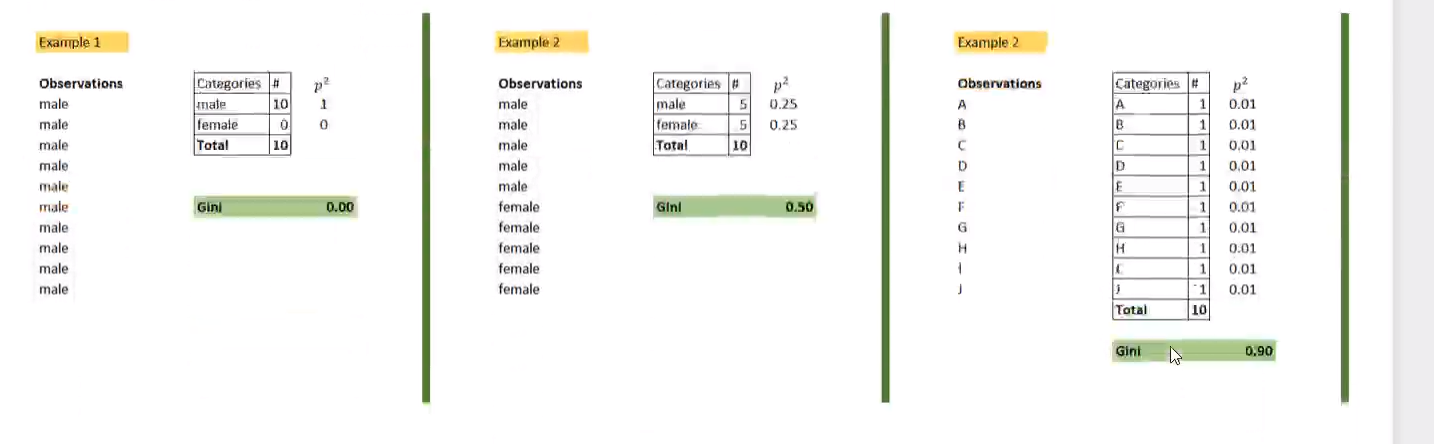

## Information Gain



* Expected reduction in entropy caused by splitting 

* Keep splitting until you obtain a as close to homogeneous class as possible



### Entropy


The entropy can explicitly be written as

$${\displaystyle \mathrm {H} (X)=\sum _{i=1}^{n}{\mathrm {P} (x_{i})\,\mathrm {I} (x_{i})}=-\sum _{i=1}^{n}{\mathrm {P} (x_{i})\log _{b}\mathrm {P} (x_{i})},}$$

where `b` is the base of the logarithm used. Common values of `b` are 2, Euler's number `e`, and 10




## Which should I use?

[Sebastian Raschka](https://sebastianraschka.com/faq/docs/decision-tree-binary.html)

* They tend to generate similar tree
* Gini tends to be faster to compute

In [81]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

In [82]:
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]

sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

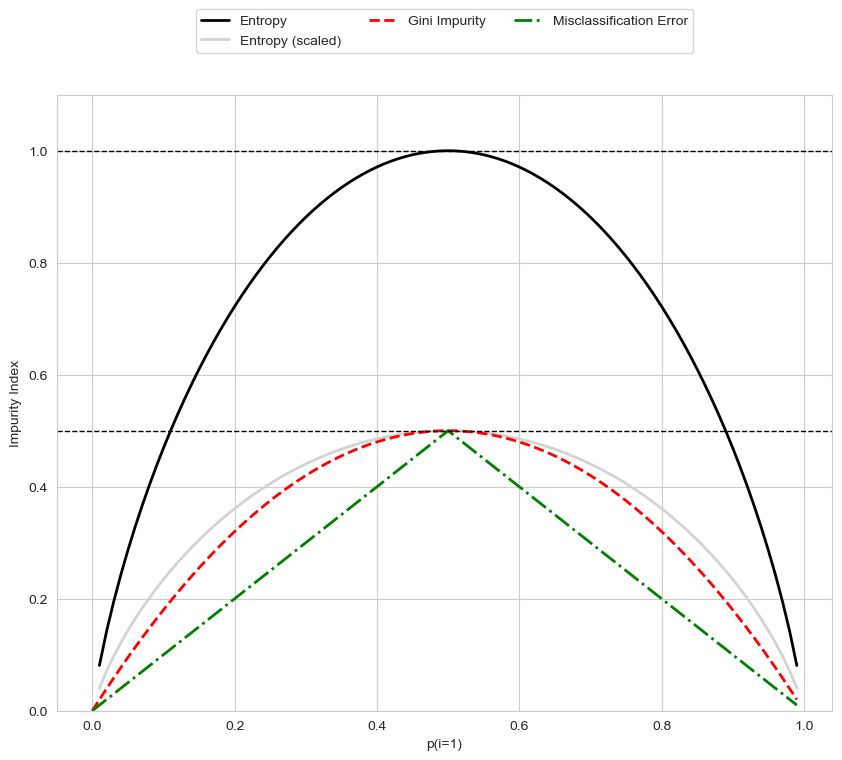

In [83]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                   ['Entropy', 'Entropy (scaled)', 
                   'Gini Impurity', 
                   'Misclassification Error'],
                   ['-', '-', '--', '-.'],
                   ['black', 'lightgray',
                      'red', 'green', 'cyan']):
     line = ax.plot(x, i, label=lab, 
                    linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
           ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

***

# Regression

In [86]:
from sklearn import tree

In [88]:
X = [[0, 0], [3, 3]]
y = [0.75, 3]

In [89]:
tree_reg = tree.DecisionTreeRegressor(random_state=42)

In [92]:
tree_reg.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [93]:
tree_reg.predict([[1.5, 1.5]])

array([0.75])

### Example - Regularization

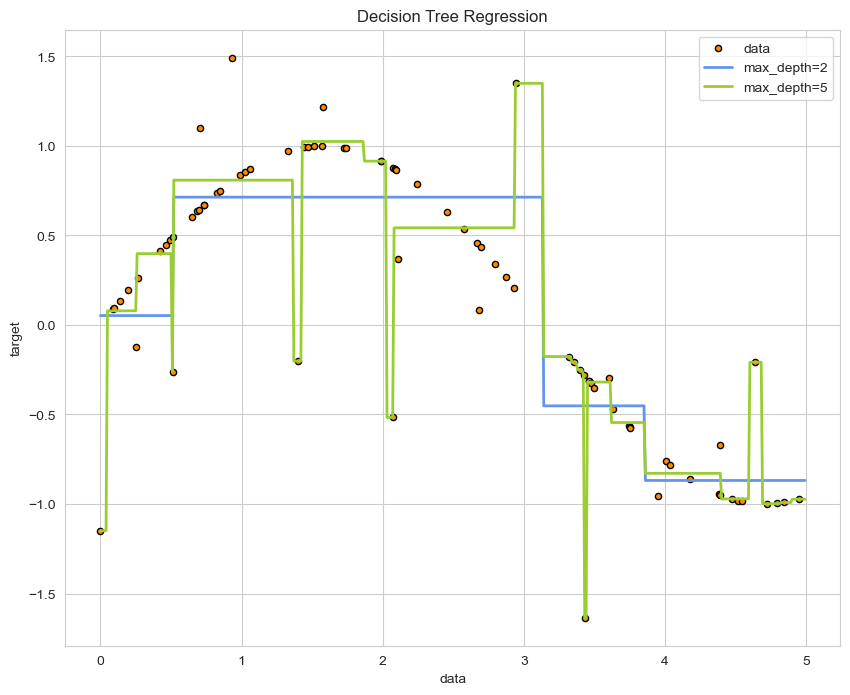

In [94]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [97]:
dot_data = tree.export_graphviz(regr_1, out_file="reg1.dot",
                                filled=True)

In [99]:
import os

dot_file = "reg1.dot"
png_file = "reg1.png"

os.system(f"dot -Tpng {dot_file} -o {png_file}")
print(f"Conversion successful. PNG file saved as '{png_file}'")

Conversion successful. PNG file saved as 'reg1.png'


<img src="reg1.png">

In [98]:
dot_data = tree.export_graphviz(regr_2, out_file="reg2.dot",
                                filled=True)

In [100]:
import os

dot_file = "reg2.dot"
png_file = "reg2.png"

os.system(f"dot -Tpng {dot_file} -o {png_file}")
print(f"Conversion successful. PNG file saved as '{png_file}'")

Conversion successful. PNG file saved as 'reg2.png'


<img src="reg2.png">

# Overfitiing

In [102]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [104]:
X = iris.data[:, 0:2]
y = iris.target

In [105]:
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [106]:
tree.export_graphviz(clf, out_file="over.dot",
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

In [107]:
import os

dot_file = "over.dot"
png_file = "overfit.png"

os.system(f"dot -Tpng {dot_file} -o {png_file}")
print(f"Conversion successful. PNG file saved as '{png_file}'")

Conversion successful. PNG file saved as 'overfit.png'


<img src="overfit.png">

# Modelling End-to-End with Decision Tree

In [108]:
from sklearn.datasets import make_moons

In [109]:
X_data, y_data = make_moons(n_samples=1000, noise=0.5, random_state=42)

In [110]:
clf1 = tree.DecisionTreeClassifier(random_state=42)
clf2 = tree.DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
params = {"min_samples_leaf": list(range(5, 20))}

In [114]:
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                              15, 16, 17, 18, 19]},
             verbose=1)

In [115]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(min_samples_leaf=16, random_state=42)

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.83

In [118]:
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy_score(y_test, y_pred)

0.74

In [122]:
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.84

In [123]:
clf1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

***

# Tips on practical use



* Decision trees tend to overfit on data with a large number of features. Check ratio of samples to number of features

* Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand

* Visualise your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth.

* Use max_depth to control the size of the tree to prevent overfitting.

* Tune `min_samples_split` or `min_samples_leaf` to control the number of samples at a leaf node. 

* Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. 

  * By sampling an equal number of samples from each class
  
  * By normalizing the sum of the sample weights (sample_weight) for each class to the same value. 


***